Notebook for predicting the breed of user images.\
Limited to the breeds in https://www.robots.ox.ac.uk/~vgg/data/pets/
1. Download the model and put it in the 4531_Final folder.\
   https://mega.nz/file/tMp2lQbD#upOPcZM5IR_Rfzts0c9kiCd6qWgwdH6BwHTt2a7CT_4
2. Copy your images (.jpg, .jpeg, .jpg, .png, .bmp, .gif) into the user_data folder.
3. Run all cells and scroll to bottom.

In [1]:
import keras
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from PIL import Image

2024-06-03 15:50:17.293950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# global_best_model.keras download (642 MB):
# https://mega.nz/file/tMp2lQbD#upOPcZM5IR_Rfzts0c9kiCd6qWgwdH6BwHTt2a7CT_4
global_best_model = keras.models.load_model('global_best_model.keras')

Dog breeds:\
american_bulldog, american_pit_bull_terrier, 
basset_hound, beagle, boxer, 
chihuahua, english_cocker_spaniel, 
english_setter, german_shorthaired, great_pyrenees, 
havanese, japanese_chin, keeshond, leonberger, 
miniature_pinscher, newfoundland, pomeranian, 
pug, saint_bernard, samoyed, scottish_terrier, 
shiba_inu, staffordshire_bull_terrier, wheaten_terrier, 
yorkshire_terrier\
Cat breeds:\
abyssinian, bengal, birman, 
bombay, british_shorthair, egyptian_mau, 
maine_coon, persian, ragdoll, 
russian_blue, siamese, sphynx

In [3]:
own_dir = r'user_data'

# Convert from jpg
def convert_jpg_to_jpeg(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            jpg_path = os.path.join(directory, filename)
            jpeg_path = os.path.join(directory, os.path.splitext(filename)[0] + ".jpeg")
            try:
                with Image.open(jpg_path) as img:
                    # remove ICC profile from an image
                    if 'icc_profile' in img.info:
                        del img.info['icc_profile']
                    img.save(jpeg_path, "JPEG")
                os.remove(jpg_path)
                #print(f"Converted {jpg_path} to {jpeg_path}")
            except Exception as e:
                print(f"Failed to convert {jpg_path}: {str(e)}")

convert_jpg_to_jpeg(own_dir)

In [5]:
# label images as abyssinian
abyssinian_dir = os.path.join(own_dir, "abyssinian")
os.makedirs(abyssinian_dir, exist_ok=True)

for filename in os.listdir(own_dir):
    if filename.lower().endswith((".jpeg", ".jpg", ".png", ".bmp", ".gif")):
        src = os.path.join(own_dir, filename)
        dst = os.path.join(abyssinian_dir, filename)
        #print(f"src:{src}\ndst:{dst}\n")
        shutil.move(src, dst)

# create empty folders for other categories so activation function with 37 neurons can work
categories = ['abyssinian', 'american_bulldog', 'american_pit_bull_terrier',
              'basset_hound', 'beagle', 'bengal', 'birman', 'bombay', 'boxer',
              'british_shorthair', 'chihuahua', 'egyptian_mau', 'english_cocker_spaniel',
              'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese',
              'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher',
              'newfoundland', 'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue',
              'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'siamese',
              'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

for category in categories:
    category_dir = os.path.join(own_dir, category)
    if not os.path.exists(category_dir):
        os.makedirs(category_dir)
        #print(f"Created directory for category: {category}")
    else:
        pass 
        #print(f"Directory for category '{category}' already exists.")


In [6]:
# function to display prediction
categories = ['abyssinian', 'american_bulldog', 'american_pit_bull_terrier',
              'basset_hound', 'beagle', 'bengal', 'birman', 'bombay', 'boxer',
              'british_shorthair', 'chihuahua', 'egyptian_mau', 'english_cocker_spaniel',
              'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese',
              'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher',
              'newfoundland', 'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue',
              'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'siamese',
              'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

def display_predicted(model, dataset, num_samples=1):
    sample_images, sample_labels = next(iter(dataset.take(num_samples)))
    predictions = model.predict(sample_images)
    true_labels = np.argmax(sample_labels, axis=1)
    predicted_labels = np.argmax(predictions, axis=1)
    
    num_rows = (num_samples + 3) // 4
    num_cols = 4
    plt.figure(figsize=(16, 4 * num_rows))
    for i in range(num_samples):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(sample_images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {categories[predicted_labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [8]:
# load data
own_dataset = image_dataset_from_directory(
    own_dir,
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical'
)

Found 1 files belonging to 37 classes.


In [9]:
# count batches to get total instances
total_instances = 0
for images, labels in own_dataset:
    total_instances += len(images)
print(total_instances)

1


2024-06-03 15:53:02.557698: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


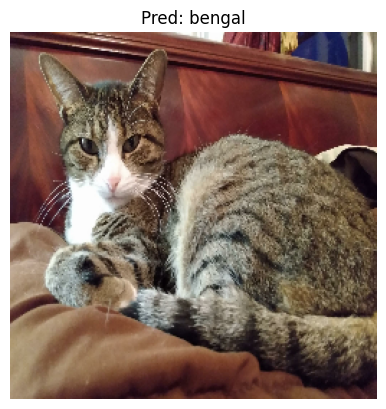

In [13]:
display_predicted(global_best_model, own_dataset, total_instances)